In [19]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Implement and Visualize Activation Functions:
  - Step Function
  - Sigmoid Function (Binary and Bipolar)
  - Tanh Function
  - ReLU Function

In [20]:
def step_function(x):
    return np.where(x >= 0, 1, 0)

In [21]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [22]:
def bipolar_sigmoid(x):
    return 2 / (1 + np.exp(-x)) - 1

In [23]:
def tanh(x):
    return np.tanh(x)

In [24]:
def relu(x):
    return np.maximum(0, x)

In [25]:
x = np.linspace(-10, 10, 100)

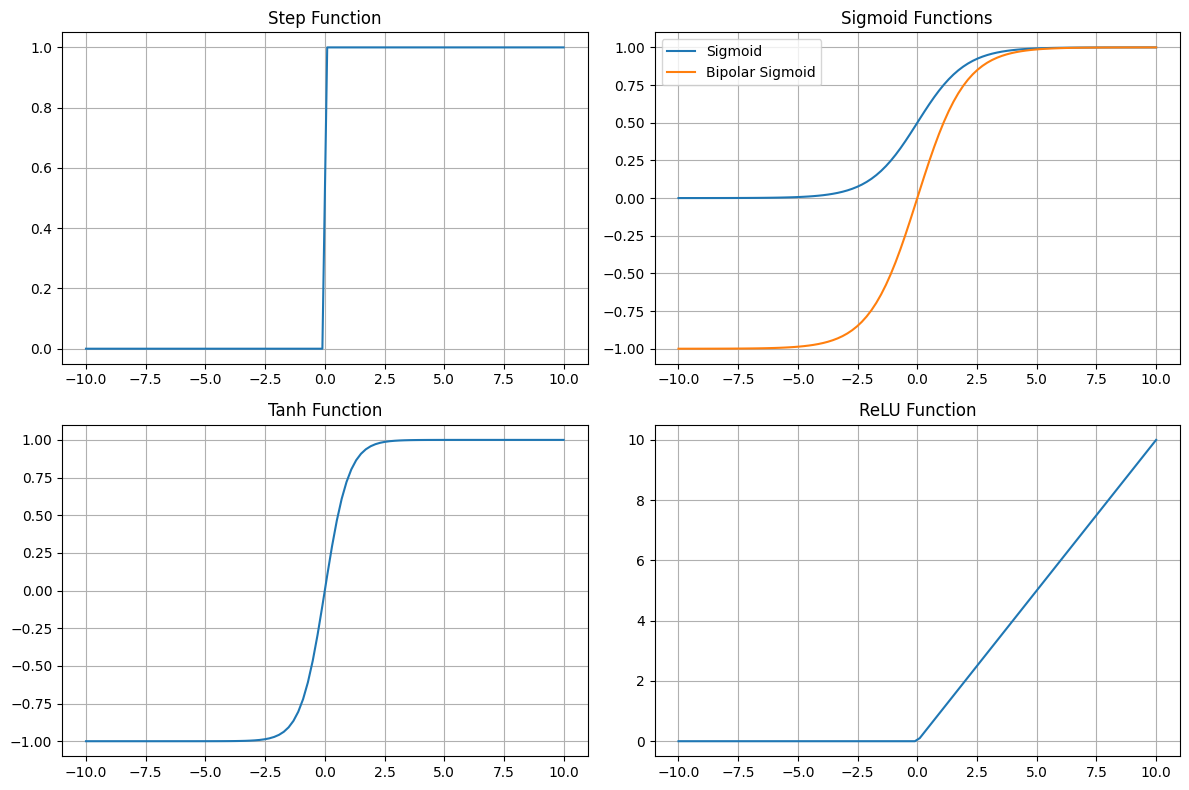

In [26]:
plt.figure(figsize=(12, 8))

# Step Function
plt.subplot(2, 2, 1)
plt.plot(x, step_function(x))
plt.title('Step Function')
plt.grid()

# Sigmoid Function
plt.subplot(2, 2, 2)
plt.plot(x, sigmoid(x), label='Sigmoid')
plt.plot(x, bipolar_sigmoid(x), label='Bipolar Sigmoid')
plt.title('Sigmoid Functions')
plt.legend()
plt.grid()

# Tanh Function
plt.subplot(2, 2, 3)
plt.plot(x, tanh(x))
plt.title('Tanh Function')
plt.grid()

# ReLU Function
plt.subplot(2, 2, 4)
plt.plot(x, relu(x))
plt.title('ReLU Function')
plt.grid()

plt.tight_layout()
plt.show()

# Implement a Simple Neural Network

In [27]:
!pip install scikit-learn

In [28]:
import tensorflow as tf
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Generate XOR data
X, y = make_moons(n_samples=1000, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to create the model
def create_model(activation):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(4, activation=activation, input_shape=(2,)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate the model with different activations
activations = ['sigmoid', 'tanh', 'relu']
results = {}

for activation in activations:
    model = create_model(activation)
    model.fit(X_train, y_train, epochs=100, verbose=0)
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    results[activation] = accuracy

print("Activation Function Performance")
for activation, accuracy in results.items():
    print(f"\n{activation} : {accuracy:.4f}")

Activation Function Performance

sigmoid : 0.8750

tanh : 0.8850

relu : 0.8900


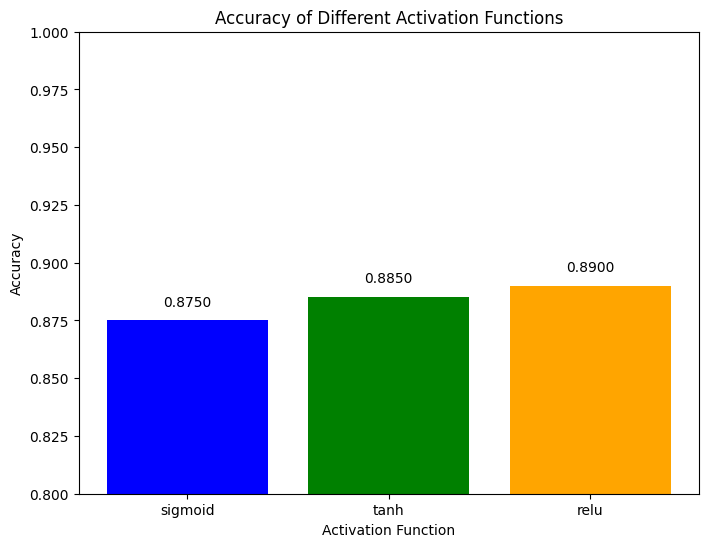

In [29]:
activation_functions = list(results.keys())
accuracies = list(results.values())

plt.figure(figsize=(8, 6))
plt.bar(activation_functions, accuracies, color=['blue', 'green', 'orange'])
plt.xlabel("Activation Function")
plt.ylabel("Accuracy")
plt.title("Accuracy of Different Activation Functions")
plt.ylim([0.8, 1.0])

for i, v in enumerate(accuracies):
    plt.text(i, v + 0.005, f"{v:.4f}", ha='center', va='bottom')

plt.show()
